In [ ]:
Inglês

Errors – the developer's daily bread
It seems indisputable that all programmers (including you) want to write error-free code and do their best to achieve this goal. Unfortunately, nothing is perfect in this world and software is no exception. Pay attention to the word exception as we’ll see it again very soon in a meaning that has nothing in common with the absolute.

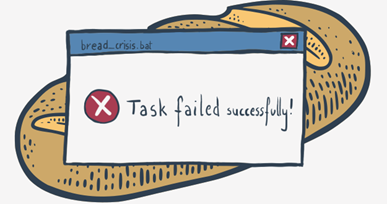

In [ ]:

 
To err is human. It's impossible to make no mistakes, and it's impossible to write error-free code. Don't get us wrong – we don't want to convince you that writing messy and faulty programs is a virtue. We rather want to explain that even the most careful programmer is not able to avoid minor or major defects. It's only those who do nothing that make no mistakes.
Paradoxically, accepting this difficult truth can make you a better programmer and may improve your code quality.
"How could this be possible?", you may ask.
We'll try to show you.

Errors in data vs. errors in code
Dealing with programming errors has (at least) two sides. The one appears when you get into trouble because your – apparently correct – code is fed with bad data. For example, you expect the code will input an integer value, but your careless user enters some random letters instead.
It may happen that your code will be terminated then, and the user will be left alone with a terse and ambiguous error message on the screen. The user will be unsatisfied, and you should be unsatisfied, too.
We're going to show you how to protect your code from this kind of failure and how not to provoke the user's anger.
The other side of dealing with programming errors reveals itself when undesirable code behavior is caused by mistakes you made when you were writing your program. This kind of error is commonly called a “bug”, which is a manifestation of a well-established belief that if a program works badly, it must be caused by malicious bugs which live inside the computer hardware and cause short circuits or other interference.
This idea is not as mad as it may look – such incidents were common in times when computers occupied large halls, consumed kilowatts of electricity, and produced enormous amounts of heat. Fortunately or not, these times are gone forever and the only bugs which can spoil your code are those you sowed in the code yourself. Therefore, we will try to show you how to find and eliminate your bugs, in other words, how to debug your code.
Let's start the journey through the land of errors and bugs.

When data is not what it should be
Let's write a piece of extremely trivial code – it will read a natural number (a non-negative integer) and print its reciprocal. In this way, 2 will turn into 0.5 (1/2) and 4 into 0.25 (1/4). Here’s the program:
Is there anything that can go wrong with it? The code is so brief and so compact that it doesn't seem like we’ll find any trouble there.
It seems that you already know where we are going. Yes, you're right – entering data that is not an integer (which also includes entering nothing at all) will completely ruin the program execution. This is what the code's user will see:
Traceback (most recent call last):
  File "code.py", line 1, in 
    value = int(input('Enter a natural number: '))
ValueError: invalid literal for int() with base 10: ''
output
All the lines Python shows you are meaningful and important, but the last line seems to be the most valuable. The first word in the line is the name of the exception which causes your code to stop. It's ValueError here. The rest of the line is just a brief explanation which more precisely specifies the cause of the occurred exception.
How do you deal with it? How do you protect your code from termination, the user from disappointment, and yourself from the user's dissatisfaction?
The very first thought that can come to your mind is to check if the data provided by the user is valid and to refuse to cooperate if the data is incorrect. In this case, the check can rely on the fact that we expect the input string to contain digits only.
You should already be able to implement this check and write it yourself, shouldn’t you? It is also possible to check if the value variable's type is an int (Python has a special means for these kinds of checks – it's an operator named is. The check itself may look like this:
type(value) is int
and evaluates to true if the current value variable's type is int.
Please forgive us if we don't spend any more time on it now – you will find more detailed explanations of the is operator in a course module devoted to Object-Oriented Programming.
You may be surprised to learn that we don't want you to do any preliminary data validation. Why? Because this is not the way Python recommends. Really.
The try-except branch
In the Python world, there is a rule that says: "It’s better to beg for forgiveness than to ask for permission".
Let's stop here for a moment. Don't get us wrong – we don't want you to apply the rule in your everyday life. Don't take anyone's car without permission in the hope that you can be so convincing that you will avoid conviction. The rule is about something else.
Actually, the rule reads: "it's better to handle an error when it happens than to try to avoid it".
"Okay," you may say now, 'but how should I beg for forgiveness when the program is terminated and there is nothing left that can be done?" This is where the exception comes on the scene.
Look at the code in the editor.
You can see two branches here:
•	first, starting with the try keyword – this is the place where you put the code you suspect is risky and may be terminated in case of error; note: this kind of error is called an exception, while the exception occurrence is called raising – we can say that an exception is (or was) raised;


•	second, the part of the code starting with the except keyword is designed to handle the exception; it's up to you what you want to do here: you can clean up the mess or you can just sweep the problem under the carpet (although we would prefer the first solution).
So, we could say that these two blocks work like this:
•	the try keyword marks the place where you try to do something without permission;
•	the except keyword starts a location where you can show off your apology talents.
As you can see, this approach accepts errors (treats them as a normal part of the program's life) instead of escalating efforts to avoid errors at all.

The exception proves the rule
Let's rewrite the code to adopt the Python approach to life:
Let us summarize what we talked about:
•	any part of the code placed between try and except is executed in a very special way – any error which occurs here won't terminate program execution. Instead, the control will immediately jump to the first line situated after the except keyword, and no other part of the try branch is executed;


•	the code in the except branch is activated only when an exception has been encountered inside the try block. There is no way to get there by any other means;


•	when either the try block or the except block is executed successfully, the control returns to the normal path of execution, and any code located beyond in the source file is executed as if nothing happened.
Now we want to ask you an innocent question: is ValueError the only way the control could fall into the except branch?
Analyze the code carefully and think over your answer!

How to deal with more than one exception
The answer is obviously "no" – there is more than one possible way to raise an exception. For example, a user may enter zero as an input – can you predict what will happen next?
Yes, you're right – the division placed inside the print() function invocation will raise the ZeroDivisionError. As you may expect, the code's behavior will be the same as in the previous case – the user will see the "I do not know what to do..." message, which seems to be quite reasonable in this context, but it's also possible that you would want to handle this kind of problem in a bit different way.
Is it possible? Of course, it is. There are at least two approaches you can implement here.
The first of them is simple and complicated at the same time: you can just add two separate try blocks, one including the input() function invocation where the ValueError may be raised, and the second devoted to handling possible issues induced by the division. Both these try blocks would have their own except branches, and in effect you will gain full control over two different errors.
This solution is good, but it is a bit lengthy – the code becomes unnecessarily bloated. Moreover, it's not the only danger that awaits you. Note that leaving the first try-except block leaves a lot of uncertainty – you will have to add extra code to ensure that the value the user has entered is safe to use in division. This is how a seemingly simple solution becomes overly complicated.
Fortunately, Python offers a simpler way to deal with this kind of challenge.
Two exceptions after one try
Look at the code in the editor. As you can see, we've just introduced the second except branch. This is not the only difference – note that both branches have exception names specified. In this variant, each of the expected exceptions has its own way of handling the error, but it must be emphasized that only one of all branches can intercept the control – if one of the branches is executed, all the other branches remain idle.
Additionally, the number of except branches is not limited – you can specify as many or as few of them as you need, but don't forget that none of the exceptions can be specified more than once.
But this still isn't the last Python word on exceptions. Stay tuned.

The default exception and how to use it
The code has changed again – can you see the difference?
We've added a third except branch, but this time it has no exception name specified – we can say it's anonymous or (what is closer to its actual role) it's the default. You can expect that when an exception is raised and there is no except branch dedicated to this exception, it will be handled by the default branch.
Note:
The default except branch must be the last except branch. Always!

Some useful exceptions
Let’s discuss in more detail some useful (or rather, the most common) exceptions you may experience.
ZeroDivisionError
This appears when you try to force Python to perform any operation which provokes division in which the divider is zero, or is indistinguishable from zero. Note that there is more than one Python operator which may cause this exception to raise. Can you guess them all?
Yes, they are: /, //, and %.
ValueError
Expect this exception when you're dealing with values which may be inappropriately used in some context. In general, this exception is raised when a function (like int() or float()) receives an argument of a proper type, but its value is unacceptable.
TypeError
This exception shows up when you try to apply a data whose type cannot be accepted in the current context. Look at the example:
short_list = [1]
one_value = short_list[0.5]
You're not allowed to use a float value as a list index (the same rule applies to tuples, too). TypeError is an adequate name to describe the problem, and an adequate exception to raise.
AttributeError
This exception arrives – among other occasions – when you try to activate a method which doesn't exist in an item you're dealing with. For example:
short_list = [1]
short_list.append(2)
short_list.depend(3)
The third line of our example attempts to make use of a method which isn’t contained in the lists. This is the place where AttributeError is raised.
SyntaxError
This exception is raised when the control reaches a line of code which violates Python's grammar. It may sound strange, but some errors of this kind cannot be identified without first running the code. This kind of behavior is typical of interpreted languages – the interpreter always works in a hurry and has no time to scan the whole source code. It is content with checking the code which is currently being run. An example of such a category of issues will be presented very soon.
It's a bad idea to handle this exception in your programs. You should produce code that is free of syntax errors, instead of masking the faults you’ve caused.

Why you can’t avoid testing your code
Although we're going to wrap up our exceptional considerations here, don't think it's all Python can offer to help you with begging for forgiveness. Python's exception machinery is far more complex, and its capabilities allow you to build expanded error handling strategies. We'll return to these issues – we promise. Feel free to conduct your experiments and to dive into exceptions yourself.
Now we want to tell you about the second side of the never-ending struggle with errors – the inevitable destiny of a developer's life. As you are not able to avoid making bugs in your code, you must always be ready to seek out and destroy them. Don't bury your head in the sand – ignoring errors won't make them disappear.
An important duty for developers is to test the newly created code, but you must not forget that testing isn't a way to prove that the code is error-free. Paradoxically, the only proof testing can provide is that your code contains errors. Don’t think you can relax after a successful test.
The second important aspect of software testing is strictly psychological. It's a truth known for years that authors – even those who are reliable and self-aware – aren't able to objectively evaluate and verify their works.
This is why each novelist needs an editor and each programmer needs a tester. Some say – a little spitefully but truthfully – that developers test the code to show their perfection, not to find problems that may frustrate them. Testers are free of such dilemmas, and this is why their work is more effective and profitable.
Of course, this doesn't absolve you from being attentive and careful. Test your code as best you can. Don't make the testers' work too easy.
Your primary duty is to ensure that you’ve checked all execution paths your code can go through. Does that sound mysterious? Nothing of the kind!
Tracing the execution paths
Now look at the code in the editor. Suppose you've just finished writing it.
There are three independent execution paths in the code – can you see them? They are determined by the if-elif-else statements. Of course, the execution paths can be built by many other statements, like loops, or even try-except blocks.
If you're going to test your code fairly and you want to sleep soundly and to dream without nightmares (nightmares about bugs can be devastating for a developer’s performance) you are obliged to prepare a test data set that will force your code to negotiate all possible paths.
In our example, the set should contain at least three float values: one positive, one negative, and zero.

When Python closes its eyes
Such a test is crucial. We want to show you why you mustn't skip it. Look at the code in the editor.
We intentionally introduced an error into the code – we hope your watchful eyes noticed it immediately. Yes, we removed just one letter and in effect, the valid print() function invocation turns into the obviously invalid clause "prin()". There is no such function as "prin()" in our program's scope, but is it really obvious for Python?
Run the code and enter 0.
As you can see, the code finishes its execution without any obstacles.
How is that possible? Why does Python overlook such an evident developer mistake?
Can you find the answers to these fundamental questions?

Tests, testing, and testers
The answer is simpler than you may expect, and a bit disappointing, too. Python – as you know for sure – is an interpreted language. This means that the source code is parsed and executed at the same time. Consequently, Python may not have time to analyze the code lines which aren't subject to execution. As an old developer's saying states: "it's a feature, not a bug" (please don't use this phrase to justify your code's weird behavior).
Do you understand now why passing through all execution paths is so vital and inevitable?
Let’s assume that you complete your code and the tests you've made are successful. You deliver your code to the testers and – fortunately! – they found some bugs in it. We’re using the word "fortunately" completely consciously. You need to accept that, firstly, testers are the developer’s best friends – don't treat the bugs they discover as an offense or a malignancy; and, secondly, each bug the testers find is a bug that won't affect the users. Both factors are valuable and worth your attention.
You already know that your code contains a bug or bugs (the latter is more likely). How do you locate them and how do you fix your code?
Bug vs. debug
The basic measure a developer can use against bugs is – unsurprisingly – a debugger, while the process during which bugs are removed from the code is called debugging. According to an old joke, debugging is a complicated mystery game in which you are simultaneously the murderer, the detective, and – the most painful part of the intrigue – the victim. Are you ready to play all these roles? Then you must arm yourself with a debugger.
A debugger is a specialized piece of software that can control how your program is executed. Using the debugger, you can execute your code line-by-line, inspect all the variables' states and change their values on demand without modifying the source code, stop program execution when certain conditions are or aren't met, and do lots of other useful tasks.
 
We can say that every IDE is equipped with a more or less advanced debugger. Even IDLE has one, although you may find its handling a bit complicated and troublesome. If you want to make use of IDLE's integrated debugger, you should activate it using the “Debug” entry in the main IDLE window menu bar. It's the start point for all debugger facilities.
Click here to see the screenshots that show the IDLE debugger during a simple debugging session. (Thank you, University of Kentucky!)
You can see how the debugger visualizes variables and parameter values, and note the call stack which shows the chain of invocations leading from the currently executed function to the interpreter level.
If you want to know more about the IDLE debugger, consult the IDLE documentation.

print debugging
This form of debugging, which can be applied to your code using any kind of debugger, is sometimes called interactive debugging. The meaning of the term is self-explanatory – the process needs your (the developer's) interaction to be performed.
Some other debugging techniques can be used to hunt bugs. It's possible that you aren't able or don't want to use a debugger (the reasons may vary). Are you helpless then? Absolutely not!
You may use one of the simplest and the oldest (but still useful) debugging tactics known as print debugging. The name speaks for itself – you just insert several additional print() invocations inside your code to output data which illustrates the path your code is currently negotiating. You can output the values of the variables which may affect the execution.
These printouts may output meaningful text like "I am here", "I entered the foo() function", "The result is 0", or they may contain sequences of characters that are legible only to you. Please don't use obscene or indecent words for the purpose, even though you may feel a strong temptation – your reputation can be ruined in a moment if these antics leak to the public.
As you can see, this kind of debugging isn't really interactive at all, or is interactive only to a small extent, when you decide to apply the input() function to stop or delay code execution.
After the bugs are found and removed, the additional printouts may be commented out or removed – it's up to you. Don't let them be executed in the final code – they may confuse both testers and users, and bring bad karma down upon you.
 
Some useful tips
Here are some tips which may help you to find and eliminate the bugs. None of them is either ultimate or definitive. Use them flexibly and rely on your intuition. Don't believe yourself – check everything twice.
1.	Try to tell someone (for example, your friend or coworker) what your code is expected to do and how it actually behaves. Be concrete and don't omit details. Answer all questions your helper asks. You'll likely realize the cause of the problem while telling your story, as speaking activates these parts of your brain which remain idle during coding. If no human can help you with the problem, use a yellow rubber duck instead. We're not kidding – consult the Wikipedia article to learn more about this commonly used technique: Rubber Duck Debugging.

2.	Try to isolate the problem. You can extract the part of your code that is suspected of being responsible for your troubles and run it separately. You can comment out parts of the code that obscure the problem. Assign concrete values to variables instead of reading them from the input. Test your functions by applying predictable argument values. Analyze the code carefully. Read it aloud.

3.	If the bug has appeared recently and didn't show up earlier, analyze all the changes you've introduced into your code – one of them may be the reason.

4.	Take a break, drink a cup of coffee, take your dog and go for a walk, read a good book for a moment or two, make a phone call to your best friend – you'll be surprised how often it helps.

5.	Be optimistic – you'll find the bug eventually; we promise you this.
Unit testing – a higher level of coding
There is also one important and widely used programming technique that you will have to adopt sooner or later during your developer career – it's called unit testing. The name may a bit confusing, as it's not only about testing the software, but also (and most of all) about how the code is written.
To make a long story short – unit testing assumes that tests are inseparable parts of the code and preparing the test data is an inseparable part of coding. This means that when you write a function or a set of cooperating functions, you're also obliged to create a set of data for which your code's behavior is predictable and known.
Moreover, you should equip your code with an interface that can be used by an automated testing environment. In this approach, any amendment made to the code (even the least significant) should be followed by the execution of all the unit tests accompanied by your source.
To standardize this approach and make it easier to apply, Python provides a dedicated module named unittest. We're not going to discuss it here – it's a broad and complex topic.
Therefore, we’ve prepared a separate course and certification path for this subject. It is called “Testing Essentials with Python”, and we invite you to participate in it.
See you soon!
Key takeaways – Exceptions
1. In Python, there is a distinction between two kinds of errors:
•	syntax errors (parsing errors), which occur when the parser comes across a statement that is incorrect. For example:

Trying to execute the following line:
print("Hello, World!)
will cause a SyntaxError, and result in the following (or similar) message being displayed in the console:
  File "main.py", line 1

    print("Hello, World!)
                        ^
SyntaxError: EOL while scanning string literal
output
Pay attention to the arrow – it indicates the place where the Python parser has run into trouble. In our case, it's the missing double quote. Did you notice it?
•	exceptions, which occur even when a statement/expression is syntactically correct; these are the errors that are detected during execution when your code results in an error which is not uncoditionally fatal. For example:

Trying to execute the following line:
print(1/0)
will cause a ZeroDivisionError exception, and result in the following (or similar) message being displayed in the console:
Traceback (most recent call last):
  File "main.py", line 1, in 
    print(1/0)
ZeroDivisionError: division by zero
output
Pay attention to the last line of the error message – it actually tells you what happened. There are many different types of exceptions, such as ZeroDivisionError, NameError, TypeError, and many more; and this part of the message informs you of what type of exception has been raised. The preceding lines show you the context in which the exception has occured.
2. You can "catch" and handle exceptions in Python by using the try-except block. So, if you have a suspicion that any particular snippet may raise an exception, you can write the code that will gracefully handle it, and will not interrupt the program. Look at the example:
while True:
    try:
        number = int(input("Enter an integer number: "))
        print(number/2)
        break
    except:
        print("Warning: the value entered is not a valid number. Try again...")
The code above asks the user for input until they enter a valid integer number. If the user enters a value that cannot be converted to an int, the program will print Warning: the value entered is not a valid number. Try again..., and ask the user to enter a number again. What happens in such a case?
1.	The program enters the while loop.
2.	The try block/clause is executed. The user enters a wrong value, for example: hello!.
3.	An exception occurs, and the rest of the try clause is skipped. The program jumps to the except block, executes it, and then continues running after the try-except block.
If the user enters a correct value and no exception occurs, the subsequent instructions in the try block are executed.
3. You can handle multiple exceptions in your code block. Look at the following examples:
while True:
    try:
        number = int(input("Enter an int number: "))
        print(5/number)
        break
    except ValueError:
        print("Wrong value.")
    except ZeroDivisionError:
        print("Sorry. I cannot divide by zero.")
    except:
        print("I don't know what to do...")
You can use multiple except blocks within one try statement, and specify particular exception names. If one of the except branches is executed, the other branches will be skipped. Remember: you can specify a particular built-in exception only once. Also, don't forget that the default (or generic) exception, that is the one with no name specified, should be placed at the bottom of the branch (use the more specific exceptions first, and the more general last).
You can also specify and handle multiple built-in exceptions within a single except clause:
while True:
    try:
        number = int(input("Enter an int number: "))
        print(5/number)
        break
    except (ValueError, ZeroDivisionError):
        print("Wrong value or No division by zero rule broken.")
    except:
        print("Sorry, something went wrong...")
4. Some of the most useful Python built-in exceptions are: ZeroDivisionError, ValueError, TypeError, AttributeError, and SyntaxError. One more exception that, in our opinion, deserves your attention is the KeyboardInterrupt exception, which is raised when the user hits the interrupt key (CTRL-C or Delete). Run the code above and hit the key combination to see what happens.
To learn more about the Python built-in exceptions, consult the official Python documentation.
5. Last but not least, you should remember about testing and debugging your code. Use such debugging techniques as print debugging; if possible – ask someone to read your code and help you to find bugs in it or to improve it; try to isolate the fragment of code that is problematic and susceptible to errors: test your functions by applying predictable argument values, and try to handle the situations when someone enters wrong values; comment out the parts of the code that obscure the issue. Finally, take breaks and come back to your code after some time with a fresh pair of eyes.
Exercise
What is the output of the following program if the user enters 0?
try:
    value = int(input("Enter a value: "))
    print(value/value)
except ValueError:
    print("Bad input...")
except ZeroDivisionError:
    print("Very bad input...")
except:
    print("Booo!")
Check



In [ ]:
PROJECT
Estimated time
30-120 minutes
Level of difficulty
Medium/Hard
Objectives
•	perfecting the student's skills in using Python for solving complex problems;
•	integrating programming techniques in one program consisting of many various parts.
Scenario
Your task is to write a simple program which pretends to play tic-tac-toe with the user. To make it all easier for you, we've decided to simplify the game. Here are our assumptions:
•	the computer (i.e., your program) should play the game using 'X's;
•	the user (e.g., you) should play the game using 'O's;
•	the first move belongs to the computer − it always puts its first 'X' in the middle of the board;
•	all the squares are numbered row by row starting with 1 (see the example session below for reference)
•	the user inputs their move by entering the number of the square they choose − the number must be valid, i.e., it must be an integer, it must be greater than 0 and less than 10, and it cannot point to a field which is already occupied;
•	the program checks if the game is over − there are four possible verdicts: the game should continue, the game ends with a tie, you win, or the computer wins;
•	the computer responds with its move and the check is repeated;
•	don't implement any form of artificial intelligence − a random field choice made by the computer is good enough for the game.
The example session with the program may look as follows:
+-------+-------+-------+
|       |       |       |
|   1   |   2   |   3   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   4   |   X   |   6   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   7   |   8   |   9   |
|       |       |       |
+-------+-------+-------+
Enter your move: 1
+-------+-------+-------+
|       |       |       |
|   O   |   2   |   3   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   4   |   X   |   6   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   7   |   8   |   9   |
|       |       |       |
+-------+-------+-------+
+-------+-------+-------+
|       |       |       |
|   O   |   X   |   3   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   4   |   X   |   6   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   7   |   8   |   9   |
|       |       |       |
+-------+-------+-------+
Enter your move: 8
+-------+-------+-------+
|       |       |       |
|   O   |   X   |   3   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   4   |   X   |   6   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   7   |   O   |   9   |
|       |       |       |
+-------+-------+-------+
+-------+-------+-------+
|       |       |       |
|   O   |   X   |   3   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   4   |   X   |   X   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   7   |   O   |   9   |
|       |       |       |
+-------+-------+-------+
Enter your move: 4
+-------+-------+-------+
|       |       |       |
|   O   |   X   |   3   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   O   |   X   |   X   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   7   |   O   |   9   |
|       |       |       |
+-------+-------+-------+
+-------+-------+-------+
|       |       |       |
|   O   |   X   |   X   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   O   |   X   |   X   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   7   |   O   |   9   |
|       |       |       |
+-------+-------+-------+
Enter your move: 7
+-------+-------+-------+
|       |       |       |
|   O   |   X   |   X   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   O   |   X   |   X   |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|   O   |   O   |   9   |
|       |       |       |
+-------+-------+-------+
You won!
Requirements
Implement the following features:
•	the board should be stored as a three-element list, while each element is another three-element list (the inner lists represent rows) so that all of the squares may be accessed using the following syntax:
board[row][column]
•	each of the inner list's elements can contain 'O', 'X', or a digit representing the square's number (such a square is considered free)
•	the board's appearance should be exactly the same as the one presented in the example.
•	implement the functions defined for you in the editor.
Drawing a random integer number can be done by utilizing a Python function called randrange(). The example program below shows how to use it (the program prints ten random numbers from 0 to 8).
Note: the from-import instruction provides access to the randrange function defined within an external Python module callled random.
from random import randrange

for i in range(10):
    print(randrange(8))


Congratulations! You have completed Module 4.
Well done! You've reached the end of Module 4 and completed a major milestone in your Python programming education. Here's a short summary of the objectives you've covered and become familiar with in Module 4:
•	the defining and using of functions − their rationale, purpose, conventions, and traps;
•	the concept of passing arguments in different ways and setting their default values, along with the mechanisms of returning the function's results;
•	name scope issues;
•	new data aggregates: tuples and dictionaries, and their role in data processing;
•	the concept of exceptions, and the importance of code testing and debugging.
You are now ready to take the module quiz and attempt the final challenge: Module 4 Test, which will help you gauge what you've learned so far.
